In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = .01 * np.random.randn(V, H).astype('f')
        W_out = .01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= .5
        self.in_layer0.backward(da)
        self.in_layer1.backward(da)
        return None

In [3]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

In [4]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

In [5]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

In [6]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 411 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 412 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 413 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 414 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 415 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 416 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 417 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 418 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 419 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 420 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 421 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 422 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 423 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 424 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 425 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 426 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 427 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 428 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 429 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 430 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 431 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 432 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 433 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 434 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 435 |  반복 1

| 에폭 794 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 795 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 796 |  반복 1 / 2 | 시간 0[s] | 손실 0.37
| 에폭 797 |  반복 1 / 2 | 시간 0[s] | 손실 0.30
| 에폭 798 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 799 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 800 |  반복 1 / 2 | 시간 0[s] | 손실 0.28
| 에폭 801 |  반복 1 / 2 | 시간 0[s] | 손실 0.39
| 에폭 802 |  반복 1 / 2 | 시간 0[s] | 손실 0.37
| 에폭 803 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 804 |  반복 1 / 2 | 시간 0[s] | 손실 0.29
| 에폭 805 |  반복 1 / 2 | 시간 0[s] | 손실 0.29
| 에폭 806 |  반복 1 / 2 | 시간 0[s] | 손실 0.39
| 에폭 807 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 808 |  반복 1 / 2 | 시간 0[s] | 손실 0.39
| 에폭 809 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 810 |  반복 1 / 2 | 시간 0[s] | 손실 0.31
| 에폭 811 |  반복 1 / 2 | 시간 0[s] | 손실 0.25
| 에폭 812 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 813 |  반복 1 / 2 | 시간 0[s] | 손실 0.29
| 에폭 814 |  반복 1 / 2 | 시간 0[s] | 손실 0.28
| 에폭 815 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 816 |  반복 1 / 2 | 시간 0[s] | 손실 0.29
| 에폭 817 |  반복 1 / 2 | 시간 0[s] | 손실 0.28
| 에폭 818 |  반복 1

/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeW

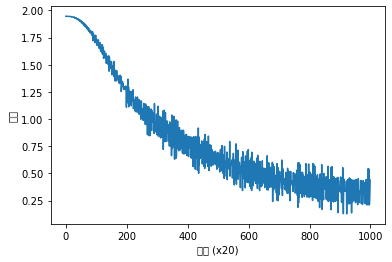

In [7]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 497 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 498 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 499 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 500 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 501 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 502 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 503 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 504 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 505 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 506 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 507 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 508 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 509 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 510 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 511 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 512 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 513 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 514 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 515 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 516 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 517 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 518 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 519 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 520 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 521 |  반복 1

| 에폭 994 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 995 |  반복 1 / 2 | 시간 0[s] | 손실 0.30
| 에폭 996 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 997 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 998 |  반복 1 / 2 | 시간 0[s] | 손실 0.30
| 에폭 999 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 1000 |  반복 1 / 2 | 시간 0[s] | 손실 0.31


/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeW

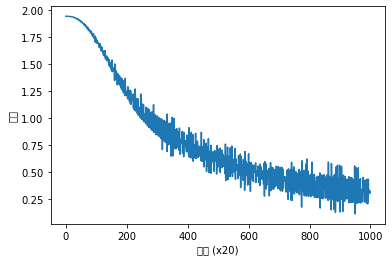

you [ 0.9558917  0.9672416 -1.671911  -1.0113126  1.0123512]
say [-1.184839   -1.1878791  -1.0883119   1.1608114   0.07701024]
goodbye [ 0.9966253   0.9860066   0.7001387  -0.9870011   0.85309875]
and [-1.0495491  -1.0473751  -0.48140714  1.0028015   1.8977702 ]
i [ 1.0079107  1.0103499  0.6958664 -1.0088725  0.8671014]
hello [ 0.96803564  0.95813274 -1.6685282  -0.9769772   0.9914444 ]
. [-0.9844647 -1.0023448 -1.2964587  1.0035098 -1.650504 ]


In [8]:
from train import *